In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Loading and Merging Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading Train Dataset

train_transaction = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ieee-fraud-detection/Data/train_transaction.csv')
train_identity = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ieee-fraud-detection/Data/train_identity.csv')

# Loading Test Dataset

test_transaction = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ieee-fraud-detection/Data/test_transaction.csv')
test_identity = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ieee-fraud-detection/Data/test_identity.csv')

In [4]:
print("Train Transaction Dataset Shape : ",train_transaction.shape)
print("Train Identity Dataset Shape : ",train_identity.shape)
print('-'*50)
print("Test Transaction Dataset Shape : ",test_transaction.shape)
print("Test Identity Dataset Shape : ",test_identity.shape)

Train Transaction Dataset Shape :  (590540, 394)
Train Identity Dataset Shape :  (144233, 41)
--------------------------------------------------
Test Transaction Dataset Shape :  (506691, 393)
Test Identity Dataset Shape :  (141907, 41)


In [7]:
# Helper function
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [9]:
train_transaction = reduce_mem_usage(train_transaction)
test_transaction = reduce_mem_usage(test_transaction)
train_identity = reduce_mem_usage(train_identity)
test_identity = reduce_mem_usage(test_identity)

Memory usage of dataframe is 542.35 MB
Memory usage after optimization is: 542.35 MB
Decreased by 0.0%
Memory usage of dataframe is 1519.24 MB
Memory usage after optimization is: 472.59 MB
Decreased by 68.9%
Memory usage of dataframe is 45.12 MB
Memory usage after optimization is: 25.86 MB
Decreased by 42.7%
Memory usage of dataframe is 44.39 MB
Memory usage after optimization is: 25.44 MB
Decreased by 42.7%


In [14]:
# Merging the transaction and identity dataset

train_data = train_transaction.merge(train_identity, how='left', on='TransactionID')
del train_transaction, train_identity

test_data = test_transaction.merge(test_identity, how='left', on='TransactionID')
del test_transaction, test_identity

In [16]:
train_data.head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
5,2987005,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.0,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.5,W,12695,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.0,H,2803,100.0,150.0,visa,226.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
9,2987009,0,86536,117.0,W,17399,111.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# test_data has a mismatch with the train data in the names of the id features, in the train data we have the id 
# feature as id_x but in the test data we have the id feature as id-x and hence we will be making all names the 
# id features in the test data same as the names of the id features of the train data 

test_data.columns = test_data.columns.str.replace('^id-', 'id_', regex=True)

In [18]:
# Checking for Duplicate Rows in the training set

duplicate_rows = train_data[train_data.duplicated()]  
print("Duplicate Rows :", duplicate_rows)

Duplicate Rows : Empty DataFrame
Columns: [TransactionID, isFraud, TransactionDT, TransactionAmt, ProductCD, card1, card2, card3, card4, card5, card6, addr1, addr2, dist1, dist2, P_emaildomain, R_emaildomain, C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12, C13, C14, D1, D2, D3, D4, D5, D6, D7, D8, D9, D10, D11, D12, D13, D14, D15, M1, M2, M3, M4, M5, M6, M7, M8, M9, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, V29, V30, V31, V32, V33, V34, V35, V36, V37, V38, V39, V40, V41, V42, V43, V44, V45, ...]
Index: []

[0 rows x 434 columns]


In [19]:
# Checking for duplicate columns

def getDuplicateColumns(df):
    
    '''
    Utility Function to get a list of duplicate columns.
    '''
    
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

duplicate_columns = getDuplicateColumns(train_data)

print(duplicate_columns)

[]


## Explore Missing Values

In [20]:
def missing_info(column, df):
    
    '''
        Utility Function to compute the missing value info
        of any feature in a dataset.
    '''
    
    na = df[column].isna()
    count = na.sum()
    total_count = df.shape[0]
    miss_prcnt = np.round((count/total_count)*100,3)
    
    return (count, miss_prcnt)

In [21]:
def missing_train_info(df):
    '''
        Utility Function to get information about missing values in the dataframe, 
        for each column the following information is given by this function.
       
            - Number of missing values present in the column.
            - Percentage of missing values in the column.
    '''
    
    columns_missing_info = []
    
    for column in df:

        count, miss_prcnt = missing_info(column, df);
        
        if(count):
            columns_missing_info.append([column, count, miss_prcnt])
      
    column_names = ['Feature_Name', 'Missing_Count', 'Missing_Percentage']
    
    missing_info_df = pd.DataFrame(data = columns_missing_info, columns = column_names)
    
    return missing_info_df

In [22]:
missing_train_df = missing_train_info(train_data)

In [23]:
# Modifying the display setting of the pandas so as to view all the rows in a dataframe

pd.set_option("display.max_rows", None, "display.max_columns", None)
# pd.reset_option("display.max_rows", "display.max_columns")

In [24]:
missing_train_df.head(train_data.shape[1])

,Feature_Name,Missing_Count,Missing_Percentage
0,card2,8933,1.513
1,card3,1565,0.265
2,card4,1577,0.267
3,card5,4259,0.721
4,card6,1571,0.266
5,addr1,65706,11.126
6,addr2,65706,11.126
7,dist1,352271,59.652
8,dist2,552913,93.628
9,P_emaildomain,94456,15.995


# Analysis

In [25]:
def cat_num_features(df):
    
    '''
        Utility Function to get the names of Categorical Features and 
        Numerical Features of the given Dataset.
    '''
    
    catf = []
    numf = []
    
    # Given Categorical Features 
    catf = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', \
            'card6', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', \
            'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', \
            'DeviceType', 'DeviceInfo']
    catf+=['id_'+str(i) for i in range(12,39)]


    # Updating the Categorical Feature Names List based on the columns present in the dataframe
    catf = [feature for feature in catf if feature in df.columns.values]
    numf = [feature for feature in df.columns if feature not in catf and not feature == 'isFraud']
    
    return (catf, numf)  

In [26]:
# Storing Categorical and Numerical Feature Names 

catf, numf = cat_num_features(train_data)

In [27]:
# Filling all the NaN values of Non-Numeric Categorical Features with "NaN" string to perform EDA

non_num = [f for f in catf if train_data[f].dtype == object]
train_data[non_num] = train_data[non_num].fillna('NaN')

Univariate - 

*Target Variable (IsFraud)*

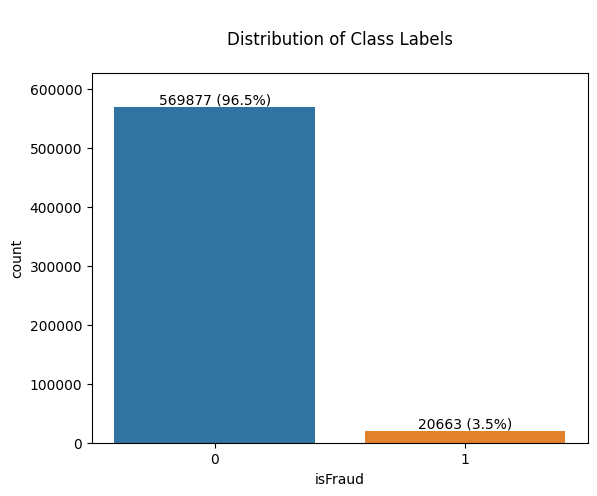

In [28]:
ax = sns.countplot(x='isFraud', data = train_data)

plt.title("\nDistribution of Class Labels\n")

plt.margins(0.05, 0.1)

for p in ax.patches:
  x=p.get_bbox().get_points()[:,0]
  y=p.get_bbox().get_points()[1,1]
  ax.annotate('{} ({:.1f}%)'.format(int(y),100.*y/len(train_data)), (x.mean(), y), 
          ha='center', va='bottom') 

plt.show()

Categorical Features:

In [29]:
# We have the followig Categorical Features

print(catf)

['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']


Product CD:

In [30]:
train_data[['ProductCD']].describe()

,ProductCD
count,590540
unique,5
top,W
freq,439670


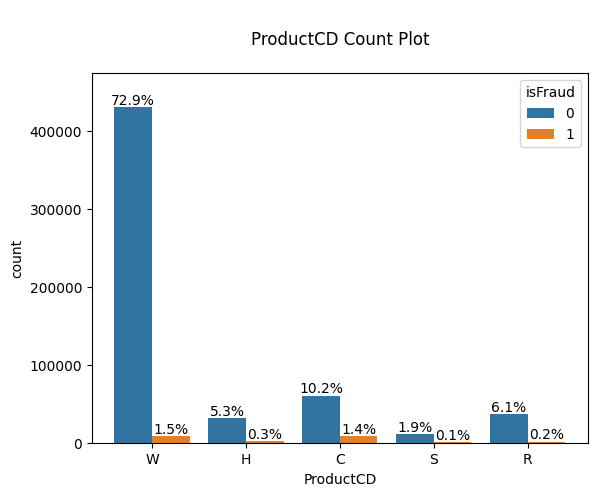

In [31]:
ax = sns.countplot(x='ProductCD', hue='isFraud', data = train_data)

plt.margins(0.05, 0.1)

for p in ax.patches:
  x=p.get_bbox().get_points()[:,0]
  y=p.get_bbox().get_points()[1,1]
  ax.annotate('{:.1f}%'.format(100.*y/len(train_data)), (x.mean(), y), 
          ha='center', va='bottom') 

plt.title('\nProductCD Count Plot\n')
plt.show()

Card1 - Card6

In [32]:
card_features = ['card'+str(i) for i in range(1,7) if "card"+str(i) in catf]

In [33]:
for f in card_features:
    print('\n',"*"*10,f,"*"*10,'\n')
    print(train_data[f].describe())
    if(train_data[f].dtype != object):
        len_unique_cat = len(np.unique(train_data[f]))
        print("\n{} feature has {} unique categories\n".format(f, len_unique_cat))


 ********** card1 ********** 

count    590540.000000
mean       9898.734658
std        4901.170153
min        1000.000000
25%        6019.000000
50%        9678.000000
75%       14184.000000
max       18396.000000
Name: card1, dtype: float64

card1 feature has 13553 unique categories


 ********** card2 ********** 

count    581607.0
mean          NaN
std           NaN
min         100.0
25%         214.0
50%         361.0
75%         512.0
max         600.0
Name: card2, dtype: float64

card2 feature has 501 unique categories


 ********** card3 ********** 

count    588975.0
mean          NaN
std           0.0
min         100.0
25%         150.0
50%         150.0
75%         150.0
max         231.0
Name: card3, dtype: float64

card3 feature has 115 unique categories


 ********** card4 ********** 

count     590540
unique         5
top         visa
freq      384767
Name: card4, dtype: object

 ********** card5 ********** 

count    586281.0
mean          NaN
std           0.0
min    

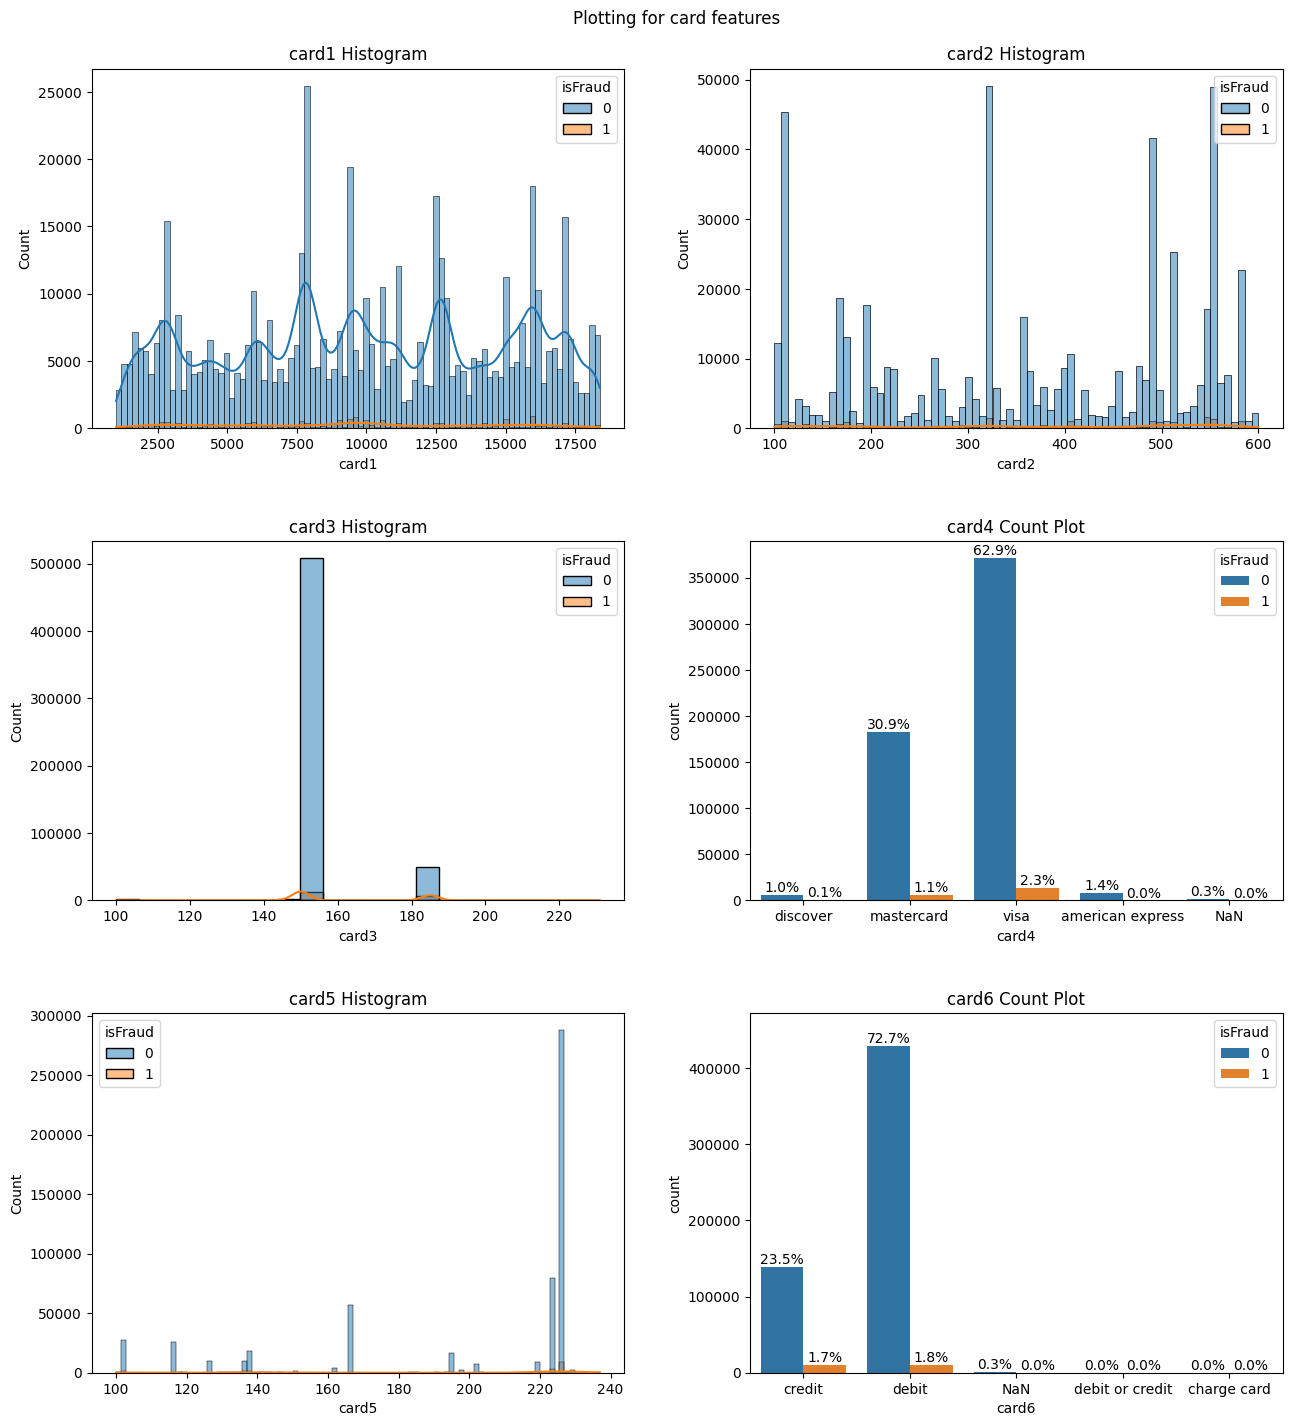

In [34]:
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

fig.tight_layout(pad=6.0)
fig.suptitle('Plotting for card features')
idx = 0

plt.margins(0.05, 0.1)

for i in range(3):
    for j in range(2):
        
        if(idx==len(card_features)):
            break
        
        f = card_features[idx]
        idx+=1
        
        if(train_data[f].dtype == object):
            sns.countplot(x=f,hue='isFraud', data=train_data, ax=axes[i,j])
            axes[i,j].set_title(f+" Count Plot")

            for p in axes[i,j].patches:
              x=p.get_bbox().get_points()[:,0]
              y=p.get_bbox().get_points()[1,1]
              axes[i,j].annotate('{:.1f}%'.format(100.*y/len(train_data)), (x.mean(), y), 
                      ha='center', va='bottom') 

        
        else:
            sns.histplot(x=f,hue='isFraud', data=train_data, ax=axes[i,j], kde=True)
            axes[i,j].set_title(f+" Histogram")

add1-add2

In [35]:
addr_features = ['addr'+str(i) for i in range(1,3) if "addr"+str(i) in catf]

In [36]:
for f in addr_features:
    print('\n',"*"*10,f,"*"*10,'\n')
    print(train_data[f].describe())
    if(train_data[f].dtype != object):
        len_unique_cat = len(np.unique(train_data[f]))
        print("\n{} feature has {} unique categories\n".format(f, len_unique_cat))


 ********** addr1 ********** 

count    524834.0
mean          NaN
std           NaN
min         100.0
25%         204.0
50%         299.0
75%         330.0
max         540.0
Name: addr1, dtype: float64

addr1 feature has 333 unique categories


 ********** addr2 ********** 

count    524834.0
mean          NaN
std           0.0
min          10.0
25%          87.0
50%          87.0
75%          87.0
max         102.0
Name: addr2, dtype: float64

addr2 feature has 75 unique categories



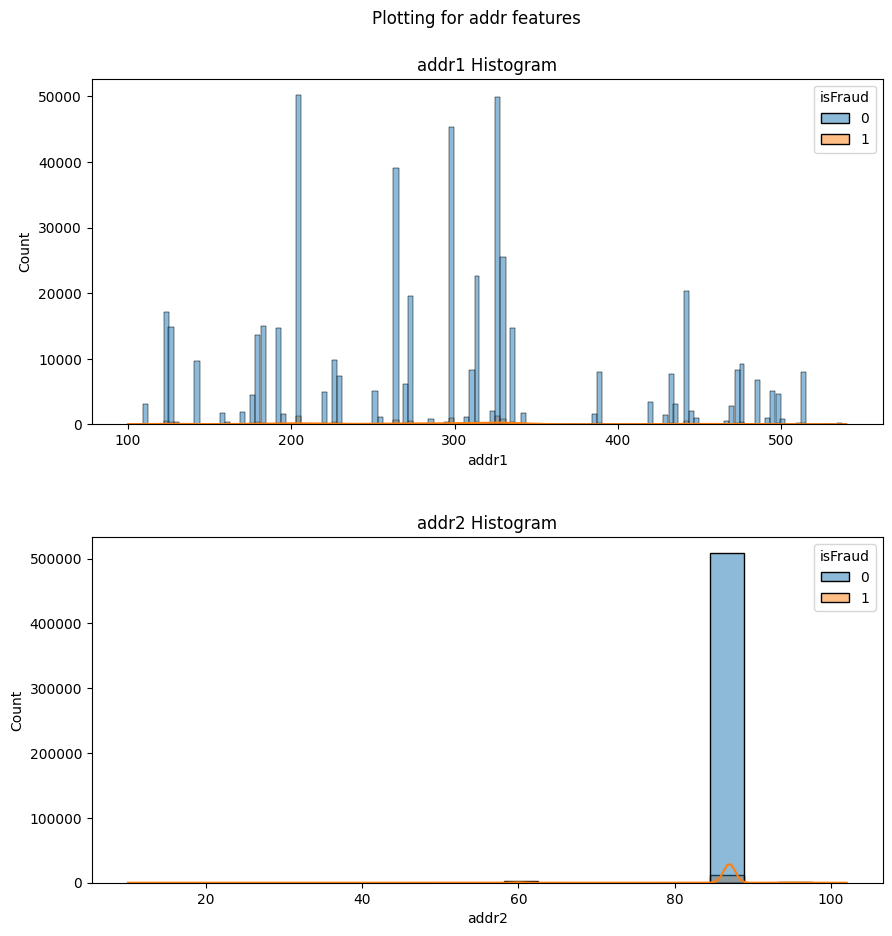

In [37]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
fig.tight_layout(pad=6.0)
fig.suptitle('Plotting for addr features')
idx = 0

for i in range(2):    
    
        if(idx==len(addr_features)):
            break
    
        f = addr_features[idx]
        idx+=1
            
        sns.histplot(x=f,hue='isFraud', data=train_data, ax=axes[i], kde=True)
        axes[i].set_title(f+" Histogram")

P_emaildomain and R_emaildomain

In [38]:
domain_features = ['P_emaildomain', 'R_emaildomain']

In [39]:
for f in domain_features:
    print('\n',"*"*10,f,"*"*10,'\n')
    print(train_data[f].describe())
    if(train_data[f].dtype != object):
        len_unique_cat = len(np.unique(train_data[f]))
        print("\n{} feature has {} unique categories\n".format(f, len_unique_cat))


 ********** P_emaildomain ********** 

count        590540
unique           60
top       gmail.com
freq         228355
Name: P_emaildomain, dtype: object

 ********** R_emaildomain ********** 

count     590540
unique        61
top          NaN
freq      453249
Name: R_emaildomain, dtype: object


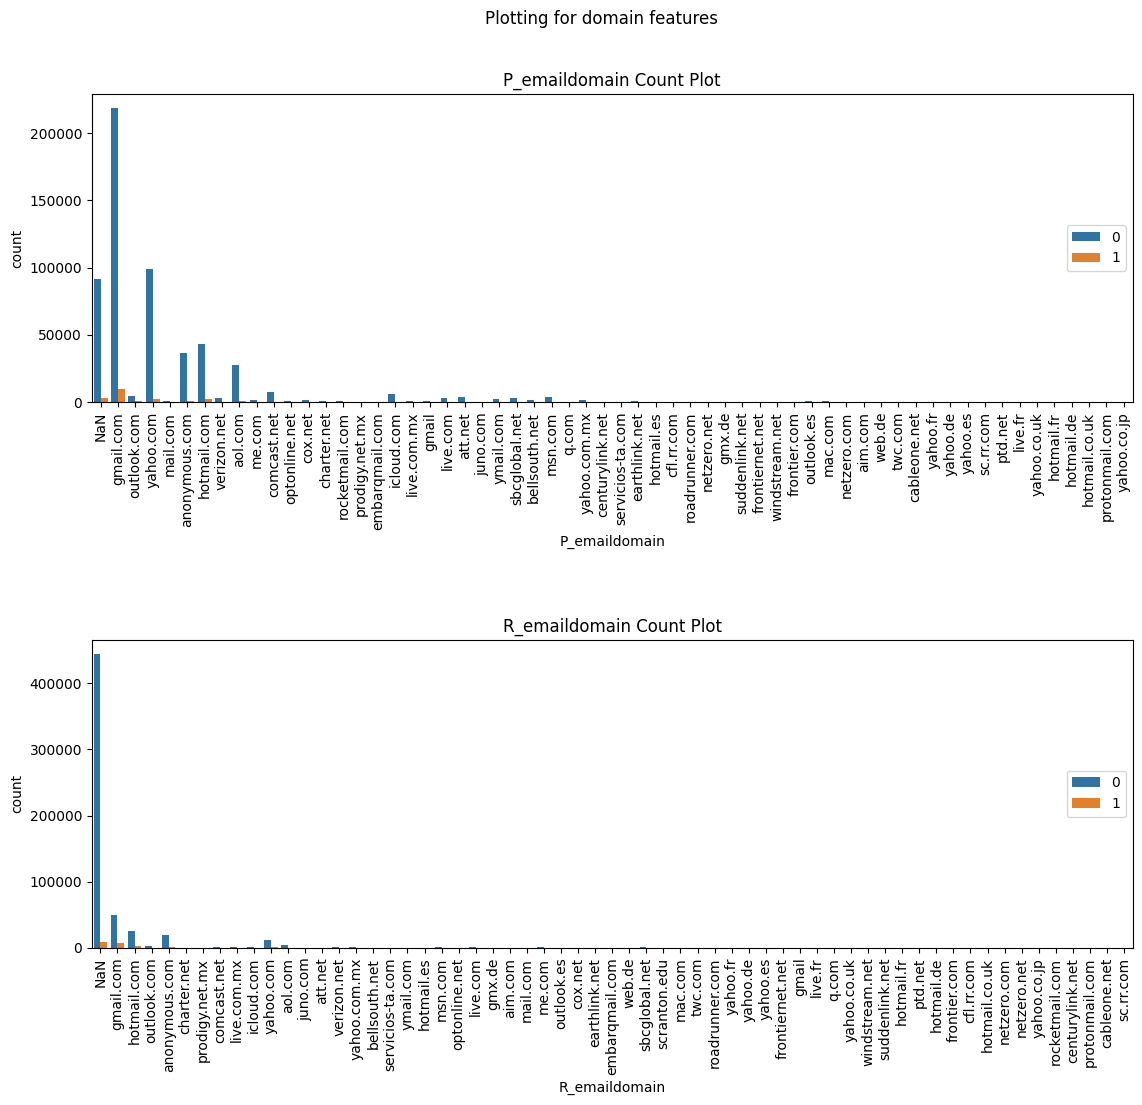

In [40]:
fig, axes = plt.subplots(2, 1, figsize=(15, 13))

fig.tight_layout(pad=15.0)
fig.suptitle('Plotting for domain features', y=0.9)
idx = 0

for i in range(2):
    
        if(idx==len(domain_features)):
            break
            
        f = domain_features[idx]
        idx+=1
        
        sns.countplot(x=f,hue='isFraud', data=train_data, ax=axes[i])
        
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='center')
        axes[i].legend(loc=7)
        axes[i].set_title(f+" Count Plot")

In [41]:
m_features = ["M"+str(i) for i in range(1,10) if "M"+str(i) in catf]

In [42]:
for f in m_features:
    print('\n',"*"*10,f,"*"*10,'\n')
    print(train_data[f].describe())
    if(train_data[f].dtype != object):
        len_unique_cat = len(np.unique(train_data[f]))
        print("\n{} feature has {} unique categories\n".format(f, len_unique_cat))


 ********** M1 ********** 

count     590540
unique         3
top            T
freq      319415
Name: M1, dtype: object

 ********** M2 ********** 

count     590540
unique         3
top            T
freq      285468
Name: M2, dtype: object

 ********** M3 ********** 

count     590540
unique         3
top          NaN
freq      271100
Name: M3, dtype: object

 ********** M4 ********** 

count     590540
unique         4
top          NaN
freq      281444
Name: M4, dtype: object

 ********** M5 ********** 

count     590540
unique         3
top          NaN
freq      350482
Name: M5, dtype: object

 ********** M6 ********** 

count     590540
unique         3
top            F
freq      227856
Name: M6, dtype: object

 ********** M7 ********** 

count     590540
unique         3
top          NaN
freq      346265
Name: M7, dtype: object

 ********** M8 ********** 

count     590540
unique         3
top          NaN
freq      346252
Name: M8, dtype: object

 ********** M9 ********** 

cou

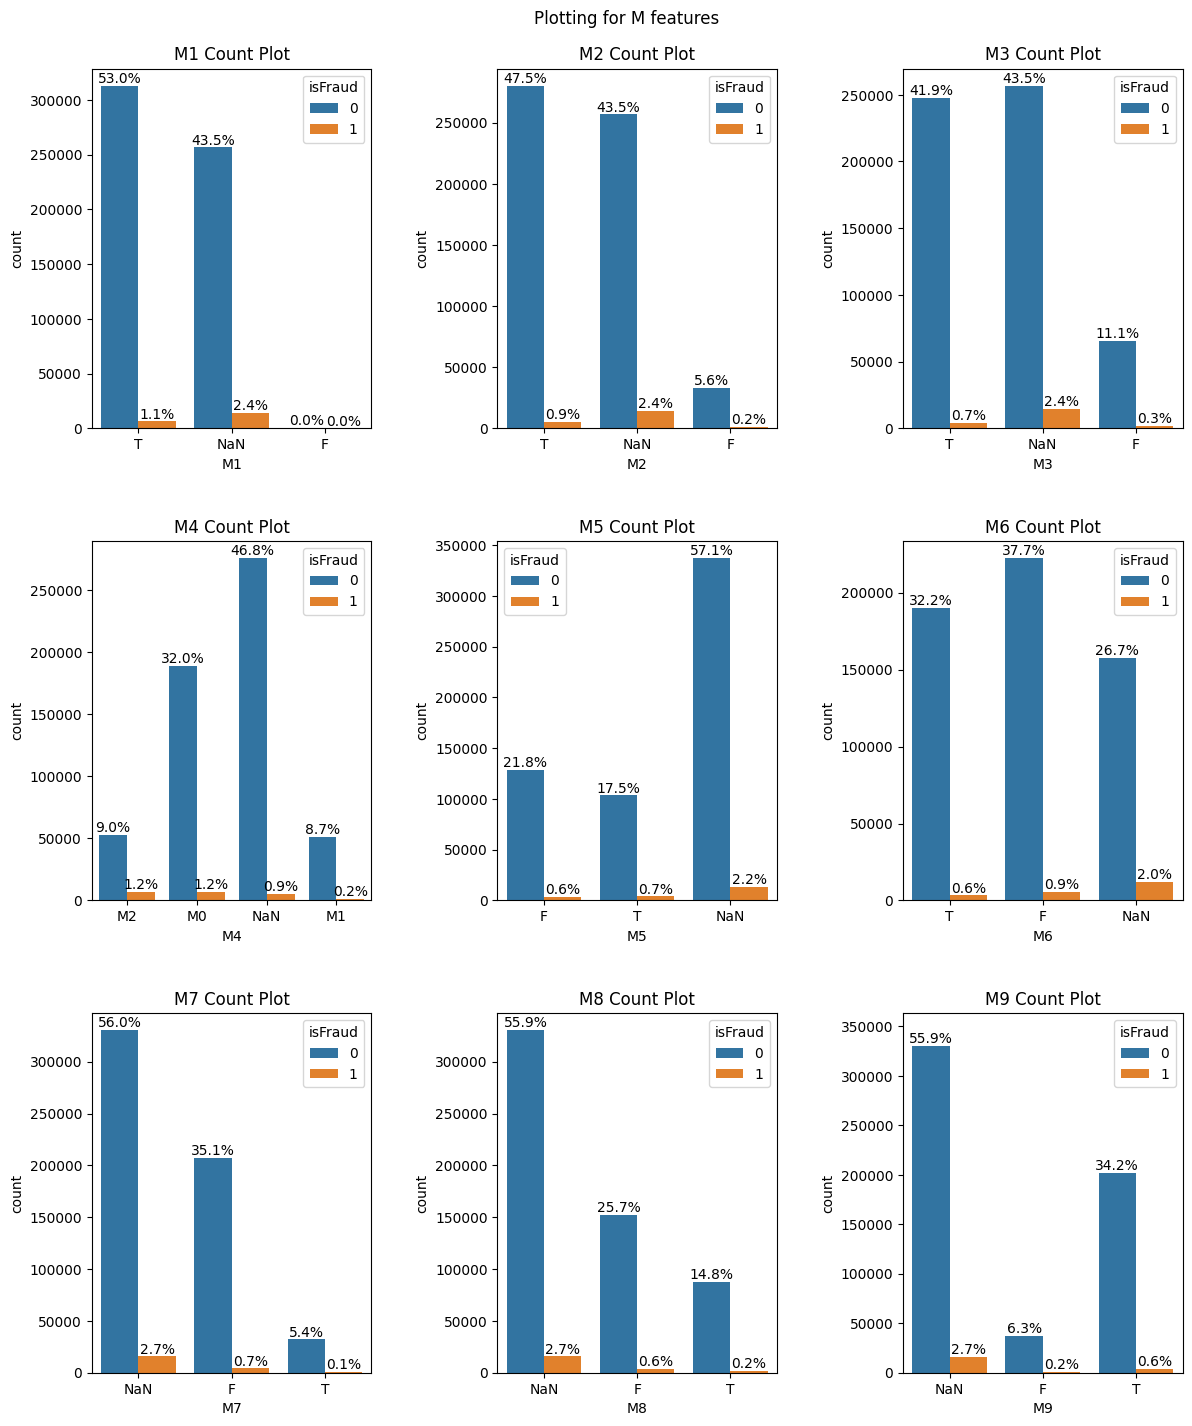

In [43]:
fig, axes = plt.subplots(3, 3, figsize=(13, 15))

fig.tight_layout(pad=6.0)
fig.suptitle('Plotting for M features')
idx = 0

plt.margins(0.05, 0.1)

for i in range(3):
    for j in range(3):
        
        if(idx==len(m_features)):
            break
        
        f = m_features[idx]
        idx+=1
        
        sns.countplot(x=f,hue='isFraud', data=train_data, ax=axes[i,j])
        
        for p in axes[i,j].patches:
              x=p.get_bbox().get_points()[:,0]
              y=p.get_bbox().get_points()[1,1]
              axes[i,j].annotate('{:.1f}%'.format(100.*y/len(train_data)), (x.mean(), y), 
                      ha='center', va='bottom') 
                
        axes[i,j].set_title(f+" Count Plot")

Device Type

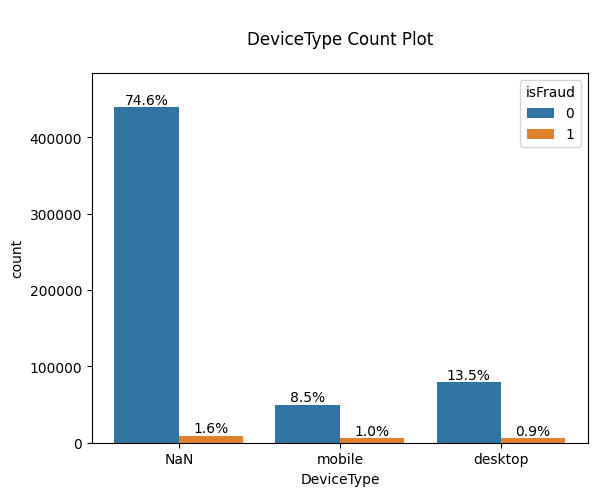

In [44]:
ax = sns.countplot(x='DeviceType', hue='isFraud', data = train_data)

plt.margins(0.05, 0.1)

for p in ax.patches:
              x=p.get_bbox().get_points()[:,0]
              y=p.get_bbox().get_points()[1,1]
              ax.annotate('{:.1f}%'.format(100.*y/len(train_data)), (x.mean(), y), 
                      ha='center', va='bottom') 

plt.title('\nDeviceType Count Plot\n')
plt.show()

Transaction DT

In [45]:
train_data[['TransactionDT']].describe().astype(int)

,TransactionDT
count,590540
mean,7372311
std,4617223
min,86400
25%,3027057
50%,7306527
75%,11246620
max,15811131


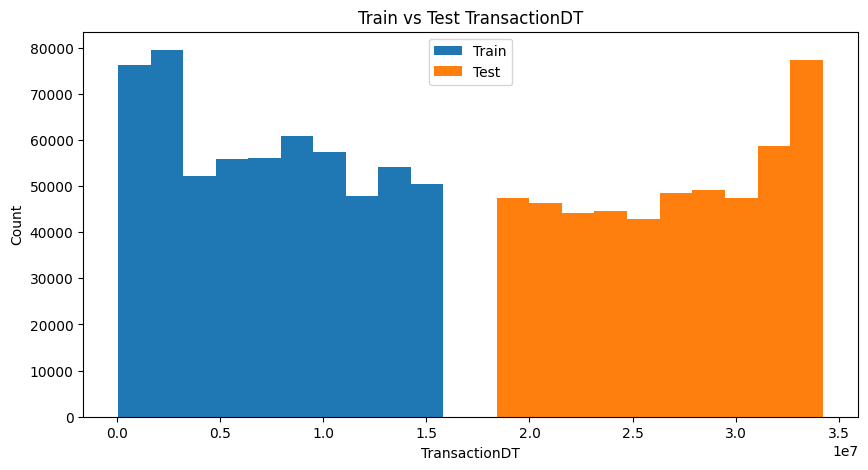

In [46]:
plt.figure(figsize=(10,5))
plt.hist(x = 'TransactionDT', data = train_data, label='Train')
plt.hist(x = 'TransactionDT', data = test_data, label='Test')
plt.title("Train vs Test TransactionDT")
plt.xlabel("TransactionDT")
plt.ylabel("Count")
plt.legend()
plt.show()

C_features



In [48]:
c_features = ["C"+str(i) for i in range(1,15) if "C"+str(i) in numf]

In [ ]:
sns.pairplot(vars = c_features, hue = 'isFraud' , data = train_data, corner=True)
plt.suptitle("\nPair Plots of C_features\n")
plt.show()

In [51]:
train_data.to_pickle('/content/drive/My Drive/Colab Notebooks/ieee-fraud-detection/Data/merged_train.pkl')
test_data.to_pickle('/content/drive/My Drive/Colab Notebooks/ieee-fraud-detection/Data/merged_test.pkl')

del train_data, test_data